In [596]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.fftpack import idct
import scipy.fftpack as fftpack
import cPickle
import numpy.polynomial.legendre as legendre

Docs:

https://unix4lyfe.org/dct-1d/

In [579]:
pi = np.pi
two_pi = 2 * np.pi
cos = np.cos

In [623]:
destination_folder = "/Users/lmatayoshi/Desktop/plots_comparativos/"

In [5]:
def generate_with_whitelist(n_points, whitelist):
    xs, ys = compute_dct_points(n_points, whitelist)
    coefficients = calculate_coefficients(ys)
    new_xs, new_ys = compute_cosine_dct(coefficients)
    base_xs, base_ys = compute_cosine(n_points, whitelist)
    plot(xs, ys, new_xs, new_ys, base_xs, base_ys)
    print "xs: "
    print xs
    print "ys: "
    print ys
    print "\n"
    print "Coefficients: "
    print coefficients

In [6]:
def generate(n_points):
    whitelist = range(1, n_points)
    generate_with_whitelist(n_points, whitelist)

In [7]:
def compute_cosine_dct(coefficients):
    n = len(coefficients)
    xs = np.linspace(0, 1, 100)
    ys = []
    for t in xs:
        #acum = 0
        acum = coefficients[0]
        for i in range(1, n):
            acum += coefficients[i] * cos(two_pi * i * t)
        ys.append(acum/len(coefficients))
    return xs, ys

In [8]:
def compute_cosine(n, whitelist):
    xs = np.linspace(0, 1, 100)
    ys = []
    for t in xs:
        acum = 0
        for i in range(1,n):
            if i in whitelist:
                acum += cos(two_pi*i*t)
                #acum += cos((two_pi / (2. * n))*i*(t+0.5))
        ys.append(acum)
    return xs, ys

In [9]:
def compute_dct_points(n, whitelist):
    xs = []
    for i in range(n):
        xs.append((float(i)/float(n)))
    ys = []
    for t in xs:
        acum = 0
        for f in range(1,n):
            if f in whitelist:
                acum += cos(two_pi * f * t)
        ys.append(acum)
    return xs, ys

In [10]:
def calculate_coefficients(ys):
    return dct(ys, norm="ortho")

In [11]:
def plot(xs, ys, new_xs, new_ys, base_xs, base_ys):
    sns.set(style="whitegrid")
    plt.plot(xs, ys, marker="o", linestyle="None", color="black")
    plt.plot(base_xs, base_ys, color="black", label="Baseline", linestyle = "--")
    plt.plot(new_xs, new_ys, color="blue", label="Computed")
    plt.legend()
    plt.show()

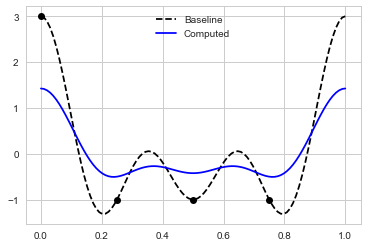

xs: 
[0.0, 0.25, 0.5, 0.75]
ys: 
[3.0, -1.0, -1.0, -0.99999999999999967]


Coefficients: 
[  2.22044605e-16   2.61312593e+00   2.00000000e+00   1.08239220e+00]


In [12]:
generate_with_whitelist(4, [1, 2, 3])

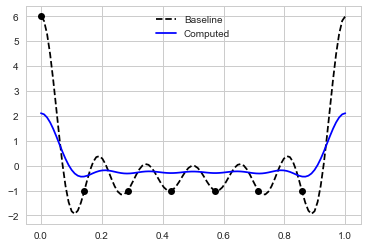

xs: 
[0.0, 0.14285714285714285, 0.2857142857142857, 0.42857142857142855, 0.5714285714285714, 0.7142857142857143, 0.8571428571428571]
ys: 
[6.0, -1.0000000000000002, -0.99999999999999989, -1.0, -0.99999999999999978, -0.99999999999999944, -0.99999999999999833]


Coefficients: 
[  8.39249721e-16   3.64784622e+00   3.37111682e+00   2.92534554e+00
   2.33288522e+00   1.62344430e+00   8.32597096e-01]


In [13]:
generate(7)

# Understanding DCT v2

In [462]:
def f1_cos(t):
    f=3
    return np.cos(2*pi*f*t)

In [463]:
def compute_from_coefficients(t, coeffs):
    accum = np.ones(t.shape[0]) * coeffs[0]
    for i in range(1, len(coeffs)):
        accum += coeffs[i] * np.cos(two_pi*i*t)
        #print accum
    return accum / len(coeffs)

In [464]:
ts = np.linspace(0, 1.0, 200)[:-1]
ys = f1_cos(ts)

In [466]:
coeffs = dct(ys, n=2, norm="ortho")
print coeffs
computed_ys = compute_from_coefficients(ts, coeffs)
#idct_ys = fftpack.idct(coeffs, n=100)
#idct_ys = np.concatenate((idct_ys, idct_ys))
#idct_ts = np.linspace(0, 1.0, idct_ys.shape[0])

[ 1.4110438   0.00316976]


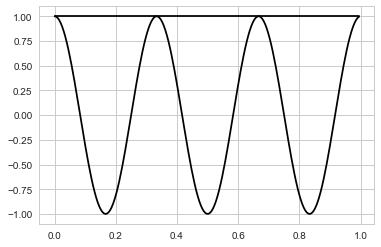

In [459]:
sns.set(style="whitegrid")
plt.plot(ts, ys, color="black")
plt.plot(ts, computed_ys, color="black")
#plt.plot(idct_ts, idct_ys, color="red")
plt.show()

In [339]:
idct_ys = fftpack.idct([0., 0., 1., 0.], n=100)
idct_ys = np.concatenate((idct_ys, idct_ys))
idct_ts = np.linspace(0, 1, idct_ys.shape[0])

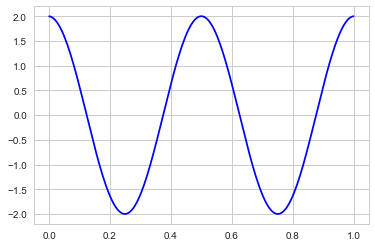

In [340]:
plt.plot(idct_ts, idct_ys, color="blue", label="IDCT")
plt.show()

# Example DOCS

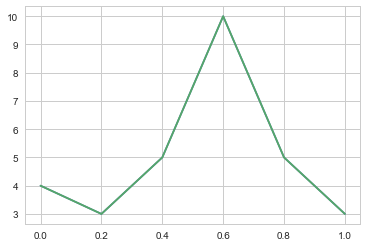

In [188]:
ys = np.array([4., 3., 5., 10., 5., 3.])
ts = np.linspace(0, 1, ys.shape[0])
plt.plot(ts, ys)
plt.show()

In [202]:
import scipy.fftpack

In [204]:
res = scipy.fftpack.fft(ys)

In [198]:
idct(res)

array([  8.7833471 ,   5.31924548,  12.24744871,  29.56795679,
        12.24744871,   5.31924548])

# Legendre (grados 1 a 3)

In [624]:
def l0(x):
    return 1

In [625]:
def l1(x):
    return x

In [626]:
def l2(x):
    return (3*(x**2)-1) * 0.5

In [627]:
def l3(x):
    return (5*(x**3) - 3*x) * 0.5

In [628]:
def l4(x):
    return (35*(x**4) - 30*(x**2) + 3) * 0.125

In [629]:
def l5(x):
    return (63*(x**5) - 70*(x**3) + 15*x) * 0.125

In [630]:
def l6(x):
    return (231*(x**6) - 315*(x**4) + 105*(x**2) - 5) * 0.0625

In [631]:
def l7(x):
    return (429*(x**7) - 693*(x**5) + 315*(x**3) - 35*x) * 0.0625

In [632]:
def l8(x):
    return (6435*(x**8) - 12012*(x**6) + 6930*(x**4) - 1260*(x**2) + 35) * (1/128.)

In [633]:
def l9(x):
    return (12155*(x**9) - 25740*(x**7) + 18018*(x**5) - 4620*(x**3) + 315*x) * (1/128.)

In [634]:
def l10(x):
    return (46189*(x**10) - 109395*(x**8) + 90090*(x**6) - 30030*(x**4) + 3465*(x**2) - 63) * (1/256.)

In [604]:
xs = np.linspace(-1, 1, 100)

In [688]:
ys_l0 = [l0(x) for x in xs]
ys_l1 = [l1(x) for x in xs]
ys_l2 = [l2(x) for x in xs]
ys_l3 = [l3(x) for x in xs]
ys_l4 = [l4(x) for x in xs]

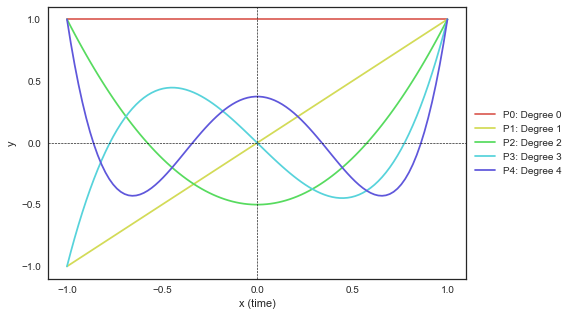

In [728]:
sns.set(style="white", palette="hls")

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

ax.plot(xs, ys_l0, label="P0: Degree 0")
ax.plot(xs, ys_l1, label="P1: Degree 1")
ax.plot(xs, ys_l2, label="P2: Degree 2")
ax.plot(xs, ys_l3, label="P3: Degree 3")
ax.plot(xs, ys_l4, label="P4: Degree 4")
ax.axvline(x=0, linestyle="--", color="black", linewidth=0.6)
ax.axhline(y=0, linestyle="--", color="black", linewidth=0.6)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1., 0.5))
plt.xticks([-1,-0.5, 0, 0.5, 1])
plt.yticks([-1,-0.5, 0, 0.5, 1])
plt.xlabel("x (time)")
plt.ylabel("y")
plt.savefig(destination_folder + "legendre")
plt.show()

In [726]:
sns.color_palette("BuGn_r")

[(0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.17139561707035755, 0.58492887351018841, 0.3263514033064206),
 (0.31578623606305267, 0.71526336024605919, 0.5384390618992696),
 (0.51607843137254905, 0.81085736255286422, 0.72735101883890807),
 (0.74196078431372547, 0.90272971933871593, 0.86895809304113802),
 (0.8853517877739332, 0.95621683967704729, 0.96682814302191467)]

# DCT (grados 1 a 3)

In [24]:
def dct_1(x):
    return cos(two_pi * x)

In [25]:
def dct_2(x):
    return cos(two_pi * 2 * x)

In [26]:
def dct_3(x):
    return cos(two_pi * 3 * x)

In [27]:
xs = np.linspace(-1, 1, 100)

In [887]:
ys_dct_1 = [dct_1(x) for x in xs]
ys_dct_2 = [dct_2(x) for x in xs]
ys_dct_3 = [dct_3(x) for x in xs]

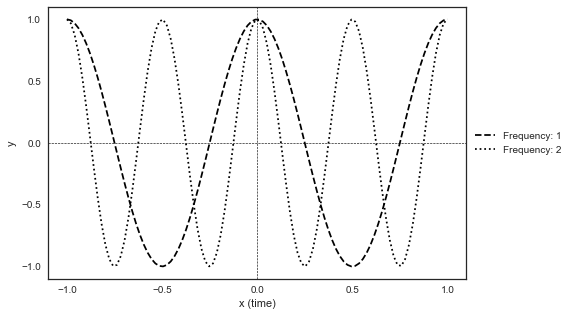

In [893]:
sns.set(style="white")

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)

plt.plot(xs, ys_dct_1, label="Frequency: 1", color="black", linestyle="--")
plt.plot(xs, ys_dct_2, label="Frequency: 2", color="black", linestyle=":")
#plt.plot(xs, ys_dct_3, label="f=3Hz", color="black", linestyle=":")

ax.axvline(x=0, linestyle="--", color="black", linewidth=0.6)
ax.axhline(y=0, linestyle="--", color="black", linewidth=0.6)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([-1,-0.5, 0, 0.5, 1])
plt.yticks([-1,-0.5, 0, 0.5, 1])
plt.xlabel("x (time)")
plt.ylabel("y")

plt.savefig(destination_folder + "dct")
plt.show()

# Real instances

In [471]:
base_dir = "/Users/lmatayoshi/Desktop/instances_i/"
instances = ["d0hn500n", "d0vn600j", "d0xn600m", "d1uc3000", "d29n500c", "d2mc3000", "d2mc3002", "d2mc300x", "d41c3000", "d41c3001"]
instances_dict = {}

In [472]:
for instance in instances:
    filename = base_dir + instance
    with open(filename, "rb") as f:
        feats = cPickle.load(f)
        instances_dict[instance] = feats

Instancia seleccionada: 'd0vn600j', MFCC 4

In [597]:
#feats = instances_dict["d0vn600j"]
#n_mfcc = 4
#print feats.shape
#ts = np.linspace(-1, 1, feats.shape[0])
#ys = feats[:, n_mfcc]

(23, 39)


# Main Comparison

Generate 3 plots, comparing:

Legendre Degree 1 - DCT 2 coefficients

Legendre Degree 2 - DCT 3 coefficients

Legendre Degree 4 - DCT 5 coefficients

In [635]:
feats = instances_dict["d0vn600j"]
n_mfcc = 4
print feats.shape
ts = np.linspace(-1, 1, feats.shape[0])
ys = feats[:, n_mfcc]

(23, 39)


In [636]:
polynomials = [l0, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10]

In [637]:
def compute_legendre_from_coeffs(coeffs):
    ts = np.linspace(-1, 1, 400)
    res = np.zeros(len(ts))
    for i in range(len(coeffs)):
        res += coeffs[i] * polynomials[i](ts)
    return ts, res

In [638]:
def restricted_approximation_with_dct(coeffs, n_instances, max_coefficient):
    n = coeffs.shape[0]
    res = np.array([])
    for i in range(n_instances):
        acum = 0
        for k in range(max_coefficient):
            s = np.sqrt(0.5) if (k==0) else 1.
            #acum += s * coeffs[k] * cos((pi * (i + 0.5) * k) / n)
            acum += s * coeffs[k] * cos((pi * (i + 0.5) * k) / n_instances)
        res = np.append(res, [acum])
    return np.sqrt(2./n) * res

In [639]:
n_coefficients = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#n_coefficients = [1]

In [640]:
"my {0} string: {1}".format("cool", "Hello there!")

'my cool string: Hello there!'

In [641]:
def plot_main(ts, ys, legendre_ts, legendre_ys, dct_ts, dct_ys, n):
    filename = destination_folder + str(n)
    sns.set(style="whitegrid", palette="dark")
    plt.plot(ts, ys, color="black", linewidth= 0.9, label="original values")
    plt.plot(legendre_ts, legendre_ys, linestyle="--", linewidth=1.3, label="legendre approx.")
    plt.plot(dct_ts, dct_ys, linestyle="--", linewidth=1.3, label="dct approx.")
    plt.xlabel("Normalized time")
    plt.ylabel("MFCC value")
    plt.title("4th MFCC of phone instance 'i' with {0} coefficients".format(n))
    plt.legend()
    plt.savefig(filename)
    plt.show()

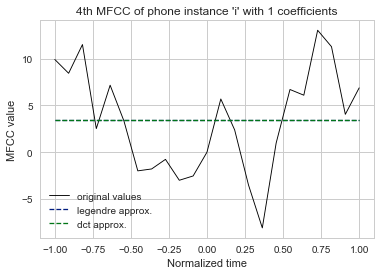

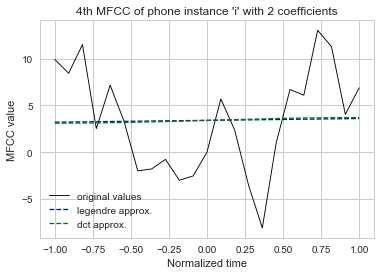

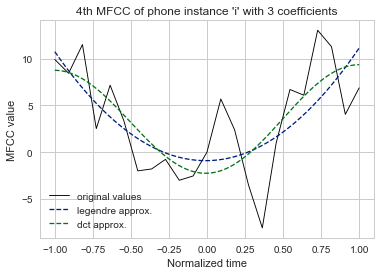

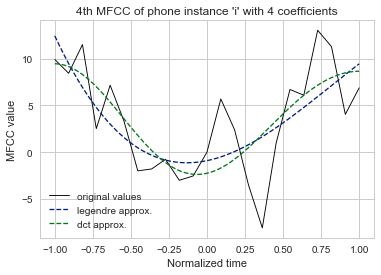

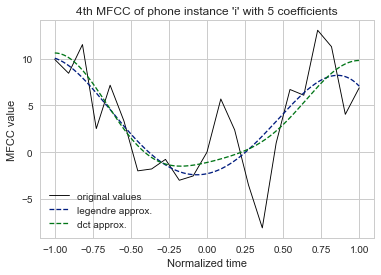

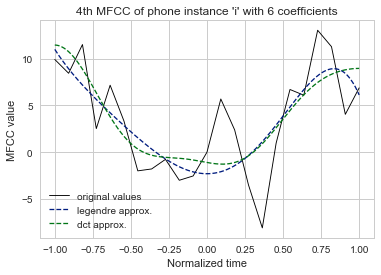

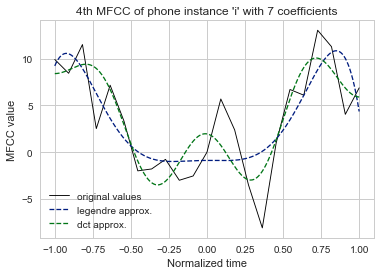

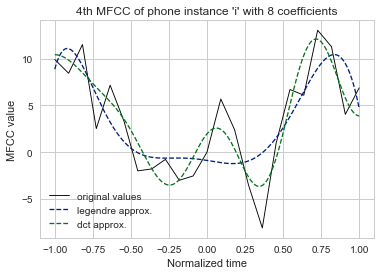

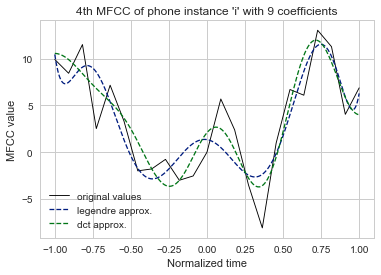

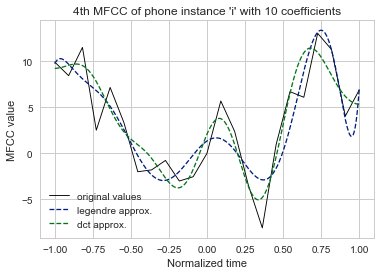

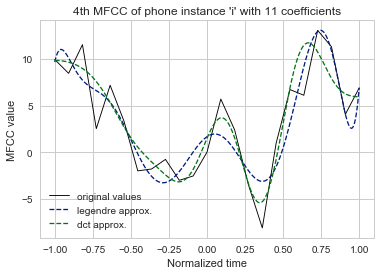

In [642]:
for n in n_coefficients:
    coeffs = legendre.legfit(ts, ys, n-1)
    legendre_ts, legendre_ys = compute_legendre_from_coeffs(coeffs)
    dct_coeffs = dct(ys, norm="ortho")
    dct_ys = restricted_approximation_with_dct(dct_coeffs, legendre_ys.shape[0], n)
    plot_main(ts, ys, legendre_ts, legendre_ys, legendre_ts, dct_ys, n)

## Legendre

In [397]:
polynomials = [l0, l1, l2, l3, l4, l5]

In [895]:
def compute_from_coeffs(coeffs):
    ts = np.linspace(-1, 1, 400)
    res = np.zeros(len(ts))
    for i in range(len(coeffs)):
        res += coeffs[i] * polynomials[i](ts)
    return ts, res

In [624]:
coeffs = legendre.legfit(ts, ys, 5)
computed_ys = compute_from_coeffs(coeffs, ts)

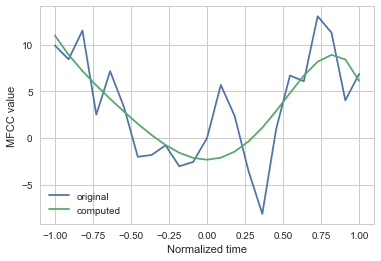

In [627]:
sns.set(style="whitegrid")
plt.plot(ts, ys, label="original")
plt.plot(ts, computed_ys, label="computed")
plt.xlabel("Normalized time")
plt.ylabel("MFCC value")
plt.legend()
plt.show()

## DCT

In [485]:
def approximate_with_dct(coeffs, n_instances):
    n = coeffs.shape[0]
    res = np.array([])
    for i in range(n_instances):
        acum = 0
        for k in range(n):
            s = np.sqrt(0.5) if (k==0) else 1.
            #acum += s * coeffs[k] * cos((pi * (i + 0.5) * k) / n)
            acum += s * coeffs[k] * cos((pi * (i + 0.5) * k) / n_instances)
        res = np.append(res, [acum])
    return np.sqrt(2./n) * res

In [564]:
def restricted_approximation_with_dct(coeffs, n_instances, max_coefficient):
    n = coeffs.shape[0]
    res = np.array([])
    for i in range(n_instances):
        acum = 0
        for k in range(max_coefficient):
            s = np.sqrt(0.5) if (k==0) else 1.
            #acum += s * coeffs[k] * cos((pi * (i + 0.5) * k) / n)
            acum += s * coeffs[k] * cos((pi * (i + 0.5) * k) / n_instances)
        res = np.append(res, [acum])
    return np.sqrt(2./n) * res

In [566]:
dest_folder = "/Users/lmatayoshi/Desktop/aproximaciones_dct/"

In [559]:
n_mfcc = 4

In [560]:
feats = instances_dict["d0vn600j"]
ts = np.linspace(-1, 1, feats.shape[0])
ys = feats[:, n_mfcc]

In [561]:
dct_coeffs = dct(ys, norm="ortho")
dct_ys = restricted_approximation_with_dct(dct_coeffs, 100)
dct_ts = np.linspace(-1, 1., dct_ys.shape[0])

In [571]:
def plot_fig(ts, ys, dct_ts, dct_ys, n_coefficients):
    filename = dest_folder + str(n_coefficients) + "_coeffs"
    sns.set(style="whitegrid")
    plt.plot(ts, ys, label="original", color="black")
    plt.plot(dct_ts, dct_ys, label="DCT approx", color="red", linestyle="--")
    plt.xlabel("Normalized time")
    plt.ylabel("MFCC values")
    plt.legend()
    plt.title("DCT approximation with: " + str(n_coefficients) + " coefficients")
    plt.savefig(filename)
    plt.show()

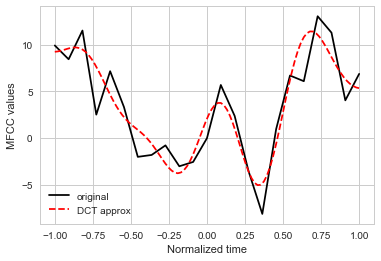

In [562]:
sns.set(style="whitegrid")
plt.plot(ts, ys, label="original", color="black")
plt.plot(dct_ts, dct_ys, label="DCT approx", color="red", linestyle="--")
plt.xlabel("Normalized time")
plt.ylabel("MFCC values")
plt.legend()
plt.show()

In [565]:
## FIGS

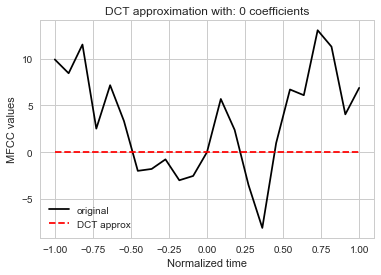

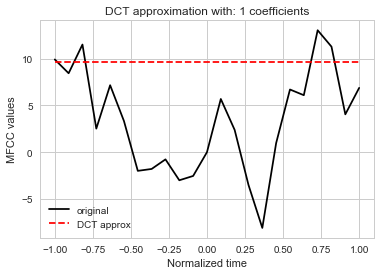

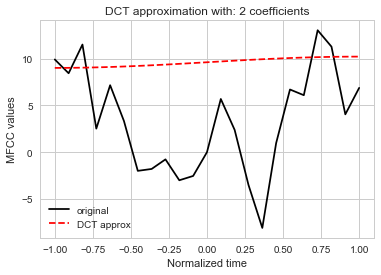

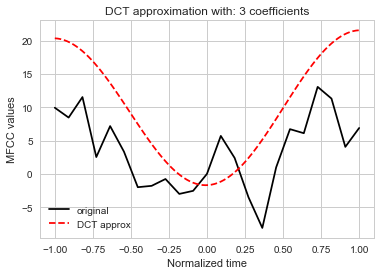

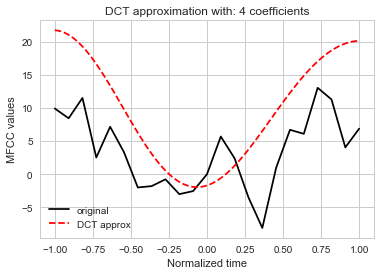

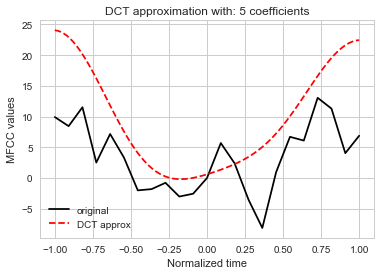

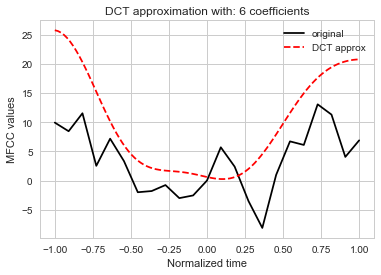

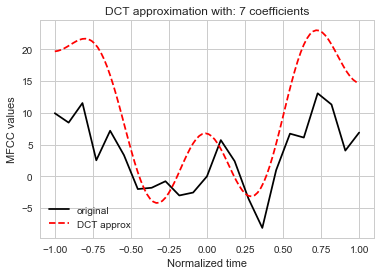

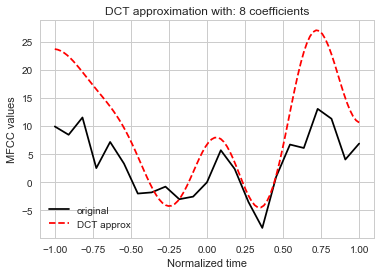

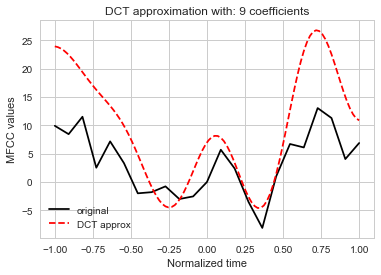

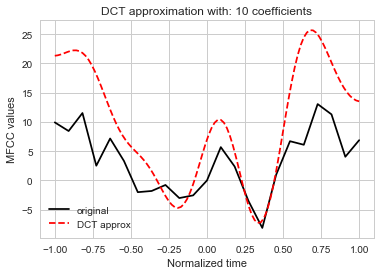

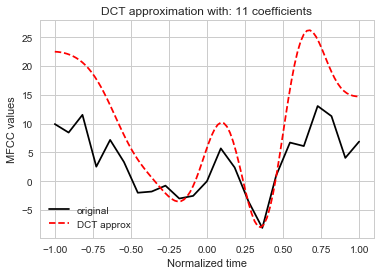

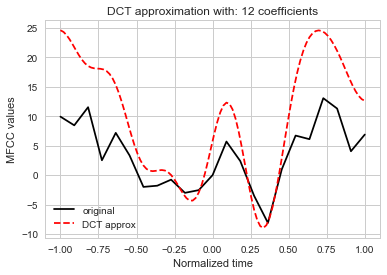

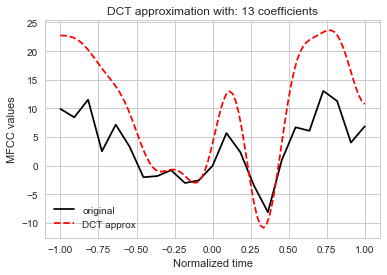

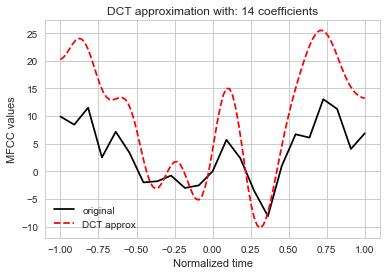

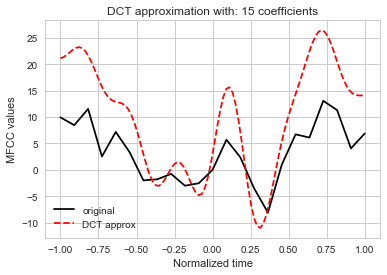

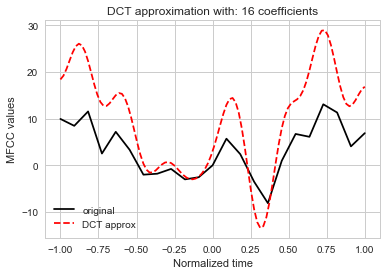

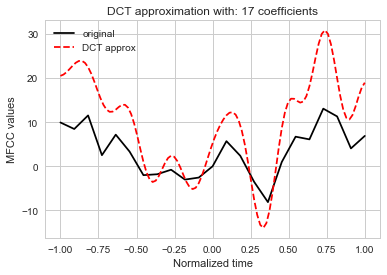

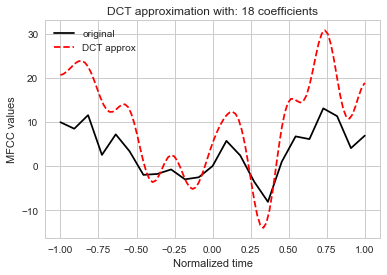

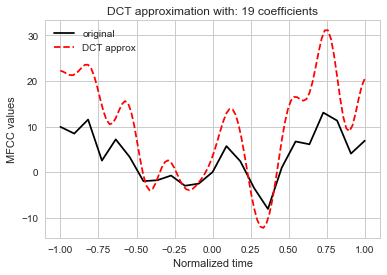

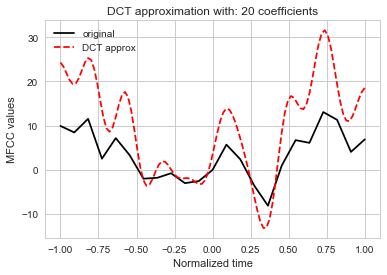

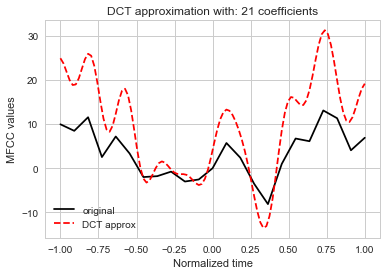

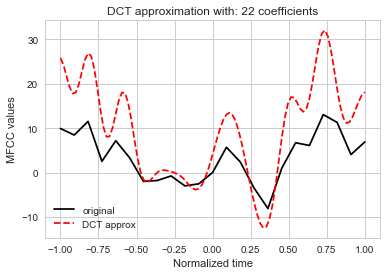

In [577]:
for i in range(ys.shape[0]):
    #dct_coeffs = dct(ys, norm="ortho")
    dct_coeffs = dct(ys)
    dct_coeffs = dct_coeffs * np.sqrt(2. / (dct_coeffs.shape[0]))
    dct_ys = restricted_approximation_with_dct(dct_coeffs, 100, i)
    dct_ts = np.linspace(-1, 1., dct_ys.shape[0])
    plot_fig(ts, ys, dct_ts, dct_ys, i)